In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import adam as adam_v2
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
forest_data=pd.read_csv("forestfires.csv")

# EDA and data visualization

In [3]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data=forest_data.iloc[:,0:11]
data=pd.concat([data,forest_data["size_category"]],axis=1)
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [6]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.shape

(517, 12)

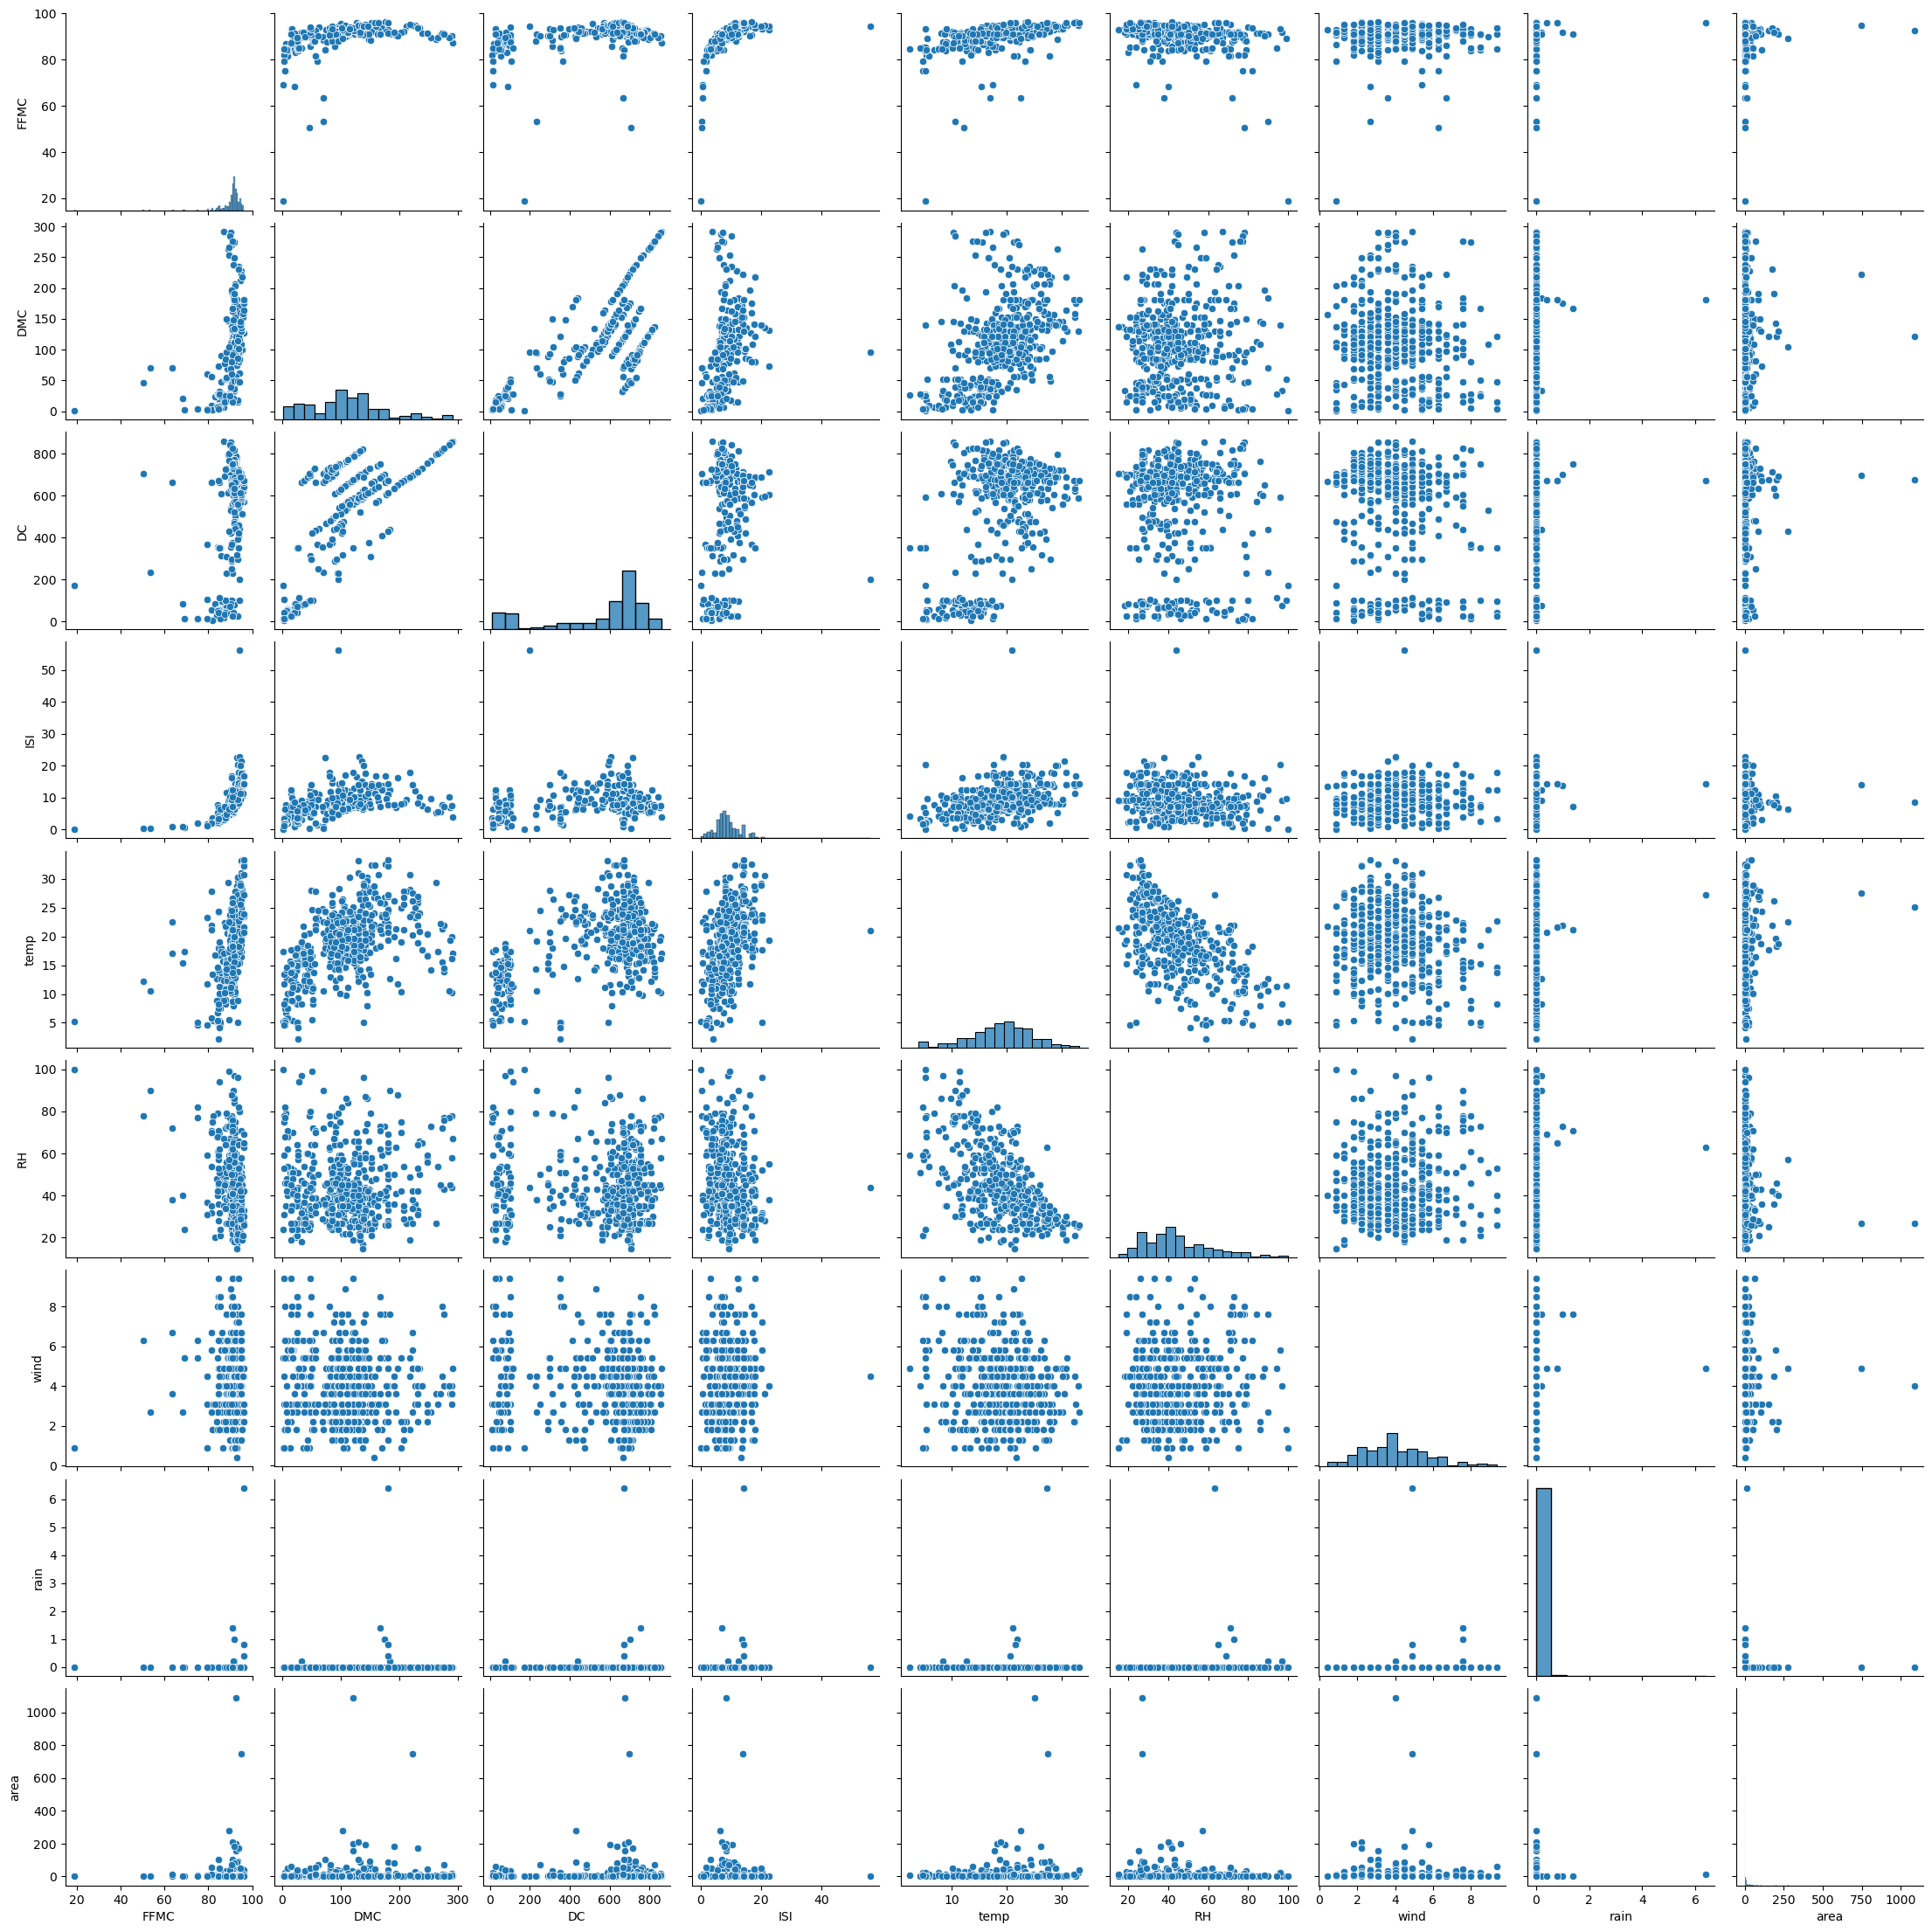

In [9]:
sns.pairplot(data)

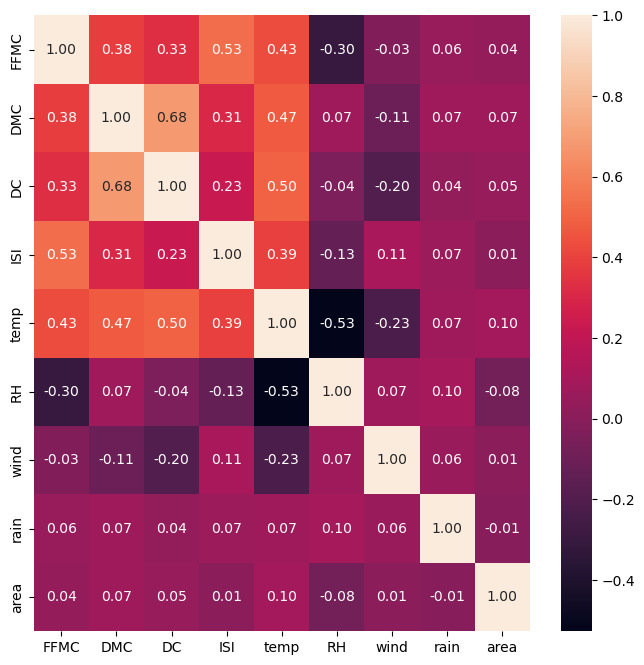

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,fmt="0.2f")
plt.show()

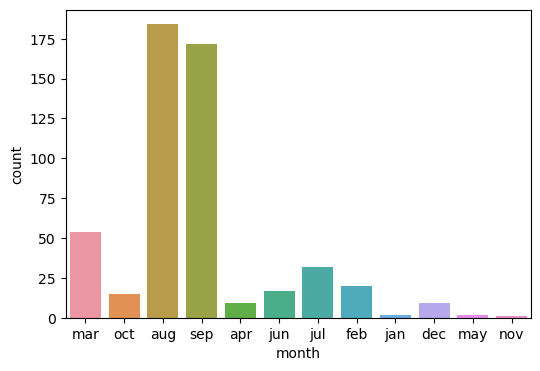

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data["month"])
plt.show()

In [12]:
label=LabelEncoder()
for i in data.columns:
    if(type(data[i][1]==str)):
        data[i]=label.fit_transform(data[i])

In [13]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,28,37,41,29,12,34,14,0,0,1
1,10,5,56,49,144,42,85,16,1,0,0,1
2,10,2,56,56,156,42,55,16,2,0,0,1
3,7,0,67,48,33,64,13,72,8,1,0,1
4,7,3,46,66,46,68,30,73,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,123,0
513,1,3,9,71,141,7,123,54,12,0,228,0
514,1,3,9,71,141,7,116,53,14,0,167,0
515,1,2,92,168,122,80,156,25,8,0,0,1


In [14]:
x=data.iloc[:,0:11]
y=data["size_category"]

In [15]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,28,37,41,29,12,34,14,0,0
1,10,5,56,49,144,42,85,16,1,0,0
2,10,2,56,56,156,42,55,16,2,0,0
3,7,0,67,48,33,64,13,72,8,1,0
4,7,3,46,66,46,68,30,73,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,123
513,1,3,9,71,141,7,123,54,12,0,228
514,1,3,9,71,141,7,116,53,14,0,167
515,1,2,92,168,122,80,156,25,8,0,0


# model building

##### Tuning of Hyperparameters using different techniques
1. Batch Size and Epochs
2. Learning rate and Drop out rate
3. Activation Function and Kernel Initializer
4. Number of Neurons in Activation layer
5. Training model with optimum values of Hyperparameters 

### 1. Batch size and Epochs

##### model 1

In [16]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(50,input_dim=11,activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="tanh"))
model.add(tf.keras.layers.Dense(20,activation="tanh"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [19]:
history=model.fit(x,y,validation_split=0.2,epochs=50,batch_size=10)

Epoch 1/50
42/42 [==============================] - 1s 7ms/step - loss: 0.4279 - accuracy: 0.8765 - val_loss: 0.3671 - val_accuracy: 0.8462
Epoch 2/50
42/42 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.9153 - val_loss: 0.3659 - val_accuracy: 0.8654
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2427 - accuracy: 0.9322 - val_loss: 0.2682 - val_accuracy: 0.9231
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1970 - accuracy: 0.9467 - val_loss: 0.2700 - val_accuracy: 0.8750
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.9564 - val_loss: 0.2156 - val_accuracy: 0.9135
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1813 - accuracy: 0.9419 - val_loss: 0.3527 - val_accuracy: 0.8462
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1727 - accuracy: 0.9370 - val_loss: 0.2331 - val_accuracy: 0.9327
Epoch 8/50
42/42 [==

In [20]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9458
accuracy: 94.58%


In [21]:
scores

[0.1377534568309784, 0.945841372013092]

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [23]:
# Standardization

a = StandardScaler()
a.fit(x)
x_standardized = a.transform(x)

##### model 2

In [24]:
model2=tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(50,input_dim=11,activation="tanh"))
model2.add(tf.keras.layers.Dense(20,activation="tanh"))
model2.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [26]:
model2.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [27]:
history=model2.fit(x,y,validation_split=0.2,epochs=50,batch_size=10)

Epoch 1/50
42/42 [==============================] - 1s 6ms/step - loss: 0.4543 - accuracy: 0.8329 - val_loss: 0.3999 - val_accuracy: 0.8654
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.9516 - val_loss: 0.3174 - val_accuracy: 0.8942
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.2111 - accuracy: 0.9516 - val_loss: 0.2614 - val_accuracy: 0.9231
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1931 - accuracy: 0.9395 - val_loss: 0.2638 - val_accuracy: 0.8942
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1670 - accuracy: 0.9492 - val_loss: 0.2273 - val_accuracy: 0.9231
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1517 - accuracy: 0.9516 - val_loss: 0.2104 - val_accuracy: 0.9231
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9564 - val_loss: 0.2479 - val_accuracy: 0.8942
Epoch 8/50
42/42 [==

In [28]:
scores = model2.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9555
accuracy: 95.55%


##### model 3

In [29]:
model3=tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(50,input_dim=11,activation="relu"))
model3.add(tf.keras.layers.Dense(20,activation="relu"))
model3.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [30]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                600       
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [31]:
model3.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [32]:
history=model3.fit(x,y,validation_split=0.2,epochs=50,batch_size=10)

Epoch 1/50
42/42 [==============================] - 1s 7ms/step - loss: 7.4575 - accuracy: 0.8668 - val_loss: 0.3900 - val_accuracy: 0.8750
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9516 - val_loss: 0.2379 - val_accuracy: 0.9135
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0992 - accuracy: 0.9588 - val_loss: 0.1823 - val_accuracy: 0.9327
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9540 - val_loss: 0.1906 - val_accuracy: 0.9135
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.9613 - val_loss: 0.3544 - val_accuracy: 0.9038
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9613 - val_loss: 0.1657 - val_accuracy: 0.9327
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0742 - accuracy: 0.9637 - val_loss: 0.0950 - val_accuracy: 0.9423
Epoch 8/50
42/42 [==

In [33]:
scores = model3.evaluate(x, y)
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9536
accuracy: 95.36%


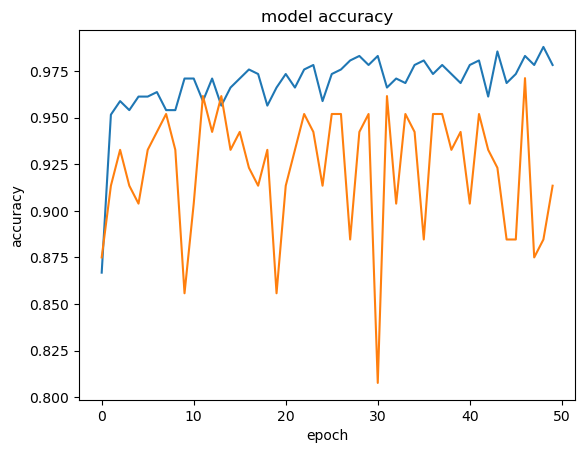

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

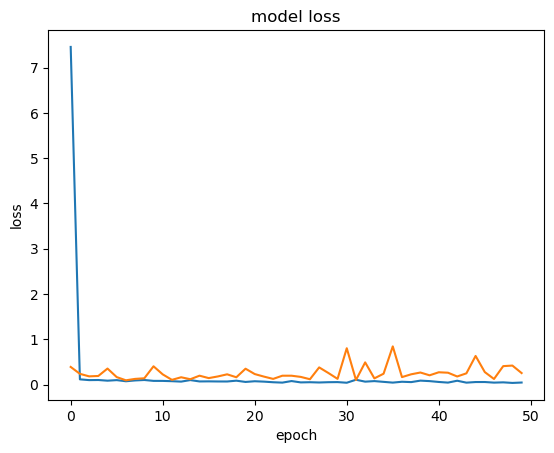

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### 2. Learning rate and Drop out rate

In [36]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate, dropout_rate):
    model3 = Sequential()
    model3.add(Dense(11,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(14,input_dim = 11,kernel_initializer = 'normal',activation = 'relu'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(learning_rate = learning_rate)

    model3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model3

In [37]:
# Create the model

model3 = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

In [38]:
# Define the grid search parameters

learning_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,
                   dropout_rate = dropout_rate)

In [39]:
# Build and fit the GridSearchCV
from sklearn.model_selection import GridSearchCV,KFold
grid = GridSearchCV(estimator = model3,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   2.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.971 total time=   1.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.990 total time=   2.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.961 total time=   1.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.951 total time=   1.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=1.000 total time=   2.2s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.971 total time=   2.1s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.981 total time=   2.1s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.961 total time=   2.1s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................
[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.942 total time=   2.1s


In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9844660282135009, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9748132944107055,0.017995283701786557 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9708924651145935,0.02379672187516564 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9747759580612183,0.01802316597912194 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9786781191825866,0.019805816067498445 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9844660282135009,0.01902515227785632 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9690067172050476,0.027024370251342373 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9805825233459473,0.024561384825713878 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.978659451007843,0.019813047577389626 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9709298014640808,0.01941780577506903 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


### 3. Activation Function and Kernel Initializer

In [41]:
# Defining the model

def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(11,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model3.add(Dropout(0.2))
    model3.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model3.add(Dropout(0.2))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(learning_rate = 0.001)
    model3.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model3

In [42]:
# Create the model

model3 = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

In [43]:
# Define the grid search parameters
activation_function = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,
                   init = init)

In [44]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model3,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   2.3s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.750 total time=   2.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.524 total time=   2.7s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.680 total time=   2.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.699 total time=   2.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=1.000 total time=   2.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.961 total time=   2.1s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.942 total time=   2.2s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=   2.1s
[CV 4/5; 11/12] START activation_f

In [45]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864077687263488, using {'activation_function': 'linear', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9805825233459473,0.024561384825713878 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9767177104949951,0.026491510636519597 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.9805825233459473,0.023781454947417 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9825242757797241,0.02162238219576884 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9805825233459473,0.024561384825713878 with: {'activa

### 4. Number of Neurons in activation layer

In [46]:
# Defining the model

def create_model(neuron1,neuron2):
    model3 = Sequential()
    model3.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'linear'))
    model3.add(Dropout(0.2))
    model3.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model3.add(Dropout(0.2))
    model3.add(Dense(1,activation = 'sigmoid'))
    
    adam = adam_v2.Adam(learning_rate = 0.001)
    model3.compile(loss = 'binary_crossentropy',
                  optimizer = adam,
                  metrics = ['accuracy'])
    return model3

In [47]:
# Create the model

model3 = KerasClassifier(build_fn = create_model,
                        verbose = 0,
                        batch_size = 40,
                        epochs = 50)

In [48]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,
                   neuron2 = neuron2)

In [49]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model3,
                    param_grid = param_grids,
                    cv = KFold(),
                    verbose = 10)

grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   2.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   2.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   2.0s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=   2.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.971 total time=   2.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [50]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9864077687263488, using {'neuron1': 4, 'neuron2': 2}
0.9864077687263488,0.016927758771990948 with: {'neuron1': 4, 'neuron2': 2}
0.9864077687263488,0.016927758771990948 with: {'neuron1': 4, 'neuron2': 4}
0.9844660282135009,0.01902515227785632 with: {'neuron1': 4, 'neuron2': 8}
0.984466016292572,0.019991517411146343 with: {'neuron1': 8, 'neuron2': 2}
0.9864077687263488,0.016927758771990948 with: {'neuron1': 8, 'neuron2': 4}
0.9844660282135009,0.01902515227785632 with: {'neuron1': 8, 'neuron2': 8}
0.9844660282135009,0.01902515227785632 with: {'neuron1': 16, 'neuron2': 2}
0.9864077687263488,0.016927758771990948 with: {'neuron1': 16, 'neuron2': 4}
0.9786407709121704,0.026339153500535555 with: {'neuron1': 16, 'neuron2': 8}


## Hyperparameters all at once
The hyperparameter optimization was carried out by taking 2 hyperparameters at once. We may have missed the best values. The performance can be further improved by finding the optimum values of hyperparameters all at once given by the code snippet below.

This process is computationally expensive.